<a href="https://colab.research.google.com/github/ashfiya-06/GenAi_2303A52366/blob/main/GenAI_Assignment_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training samples: 60000
Test samples: 10000
Image dimensions: (28, 28)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 33)          │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 33)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          19,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,620 (881.33 KB)

 Trainable params: 225,620 (881.33 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 62s 36ms/step - accuracy: 0.9040 - loss: 0.3110 - val_accuracy: 0.9850 - val_loss: 0.0482
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 28ms/step - accuracy: 0.9855 - loss: 0.0460 - val_accuracy: 0.9910 - val_loss: 0.0335
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9901 - loss: 0.0294 - val_accuracy: 0.9903 - val_loss: 0.0339
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9940 - loss: 0.0192 - val_accuracy: 0.9883 - val_loss: 0.0411
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9954 - loss: 0.0142 - val_accuracy: 0.9922 - val_loss: 0.0313
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9964 - loss: 0.0109 - val_accuracy: 0.9910 - val_loss: 0.0434
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9960 - loss: 0.0112 - val_accuracy: 0.9907 - val_loss: 0.0352
Epoch 8/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step - accuracy: 0.9980 -

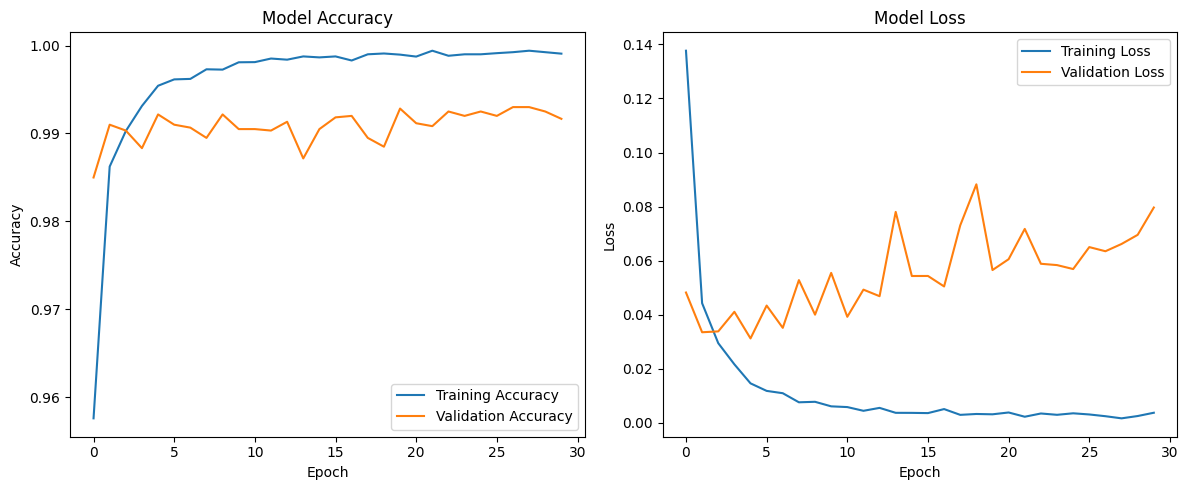


Training and Testing Metrics:
--------------------------------------------------
Dataset        Accuracy       Loss           
--------------------------------------------------
Training       0.99910.0038
Testing        0.99220.0506
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


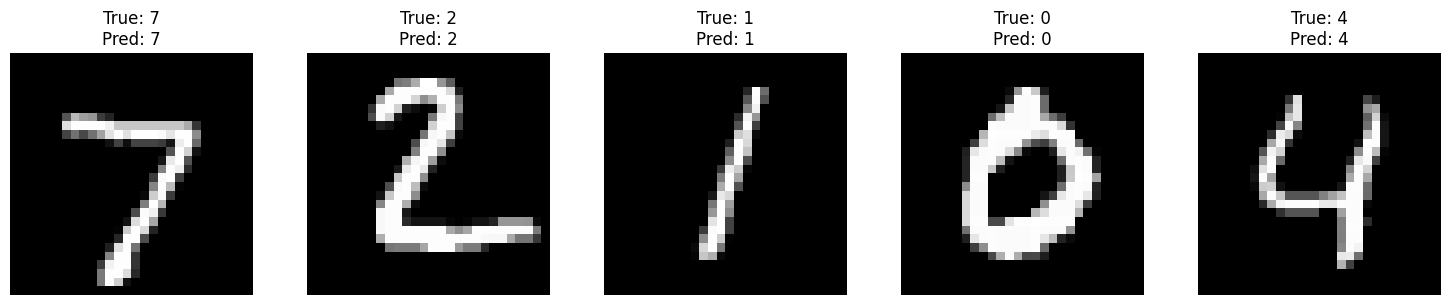

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# 1. Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Reshape images to include channel dimension (required for CNN)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Training samples: {x_train.shape[0]}")
print(f"Test samples: {x_test.shape[0]}")
print(f"Image dimensions: {x_train.shape[1:3]}")

# 2. Build the CNN model according to the provided architecture
model = keras.Sequential([
    # Convolution Layer - 1: 33 filters, 3x3 kernel, ReLU activation
    layers.Conv2D(33, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    # Max Pooling Layer - 1: 2x2 pool size
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Convolution Layer - 2: 64 filters, 3x3 kernel, ReLU activation
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    # Max Pooling Layer - 2: 2x2 pool size
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output for the dense layer
    layers.Flatten(),

    # Dense Layer: 128 neurons, ReLU activation
    layers.Dense(128, activation="relu"),

    # Output Layer: 10 neurons (one for each digit), softmax activation
    layers.Dense(10, activation="softmax")
])

# 3. Compile the model
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Print model summary
model.summary()

# 4. Train the model with the specified parameters
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=30,
    validation_split=0.1,
    verbose=1
)

# 5. Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# 6. Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 7. Create a table with training and testing metrics
print("\nTraining and Testing Metrics:")
print("-" * 50)
print(f"{'Dataset':<15}{'Accuracy':<15}{'Loss':<15}")
print("-" * 50)
print(f"{'Training':<15}{history.history['accuracy'][-1]:.4f}{history.history['loss'][-1]:.4f}")
print(f"{'Testing':<15}{test_accuracy:.4f}{test_loss:.4f}")
print("-" * 50)

# 8. Visualize some predictions
def plot_predictions(x, y_true, y_pred, n=5):
    plt.figure(figsize=(15, 3))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(x[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {np.argmax(y_true[i])}\nPred: {np.argmax(y_pred[i])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Make predictions on test data
predictions = model.predict(x_test[:5])
plot_predictions(x_test[:5], y_test[:5], predictions)